In [2]:
import mdtraj as md

In [3]:
hns = md.load('./H-NS_DBD-DNA.pdb')
selection = hns.top.select('chainid 2')
dbd = hns.atom_slice(selection)
selection = hns.top.select('chainid 0 1')
dna = hns.atom_slice(selection)

new = dbd.stack(dna)
new.save('./H-NS_DBD-DNA_noion.pdb')

In [3]:
s1s1 = md.load('./H-NS_s1s1_open.pdb')
selection = s1s1.top.select('chainid 0 1')
s1s1 = s1s1.atom_slice(selection)
s1s1.save('./H-NS_s1s1_noion.pdb')

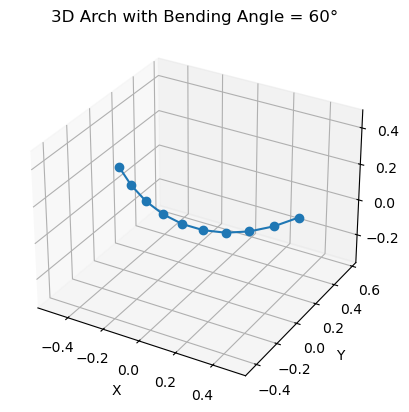

[[-0.5         0.1339746   0.1339746 ]
 [-0.39607977  0.08178389  0.08178389]
 [-0.28680323  0.04201049  0.04201049]
 [-0.17364818  0.01519225  0.01519225]
 [-0.05814483  0.00169184  0.00169184]
 [ 0.05814483  0.00169184  0.00169184]
 [ 0.17364818  0.01519225  0.01519225]
 [ 0.28680323  0.04201049  0.04201049]
 [ 0.39607977  0.08178389  0.08178389]
 [ 0.5         0.1339746   0.1339746 ]]


In [10]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def generate_3d_arch(bending_angle, n_points, arch_height):
    # Convert bending angle to radians
    theta = np.radians(bending_angle)

    # Calculate the radius of the circle
    r = 1 / (2 * np.sin(theta / 2))

    # Generate angles for the points on the arc
    angles = np.linspace(-theta / 2, theta / 2, n_points)

    # Calculate x and y coordinates of the points
    x = r * np.sin(angles)
    y = r * (1 - np.cos(angles))
    
    # Calculate z coordinates for a gentle height increase
    z = arch_height * (1 - np.cos(angles))  # This creates a similar gentle arch in the z-direction

    # Create the array of points
    points = np.vstack((x, y, z)).T

    return points

# Parameters
bending_angle = 60  # Bending angle in degrees
n_points = 10  # Number of points
arch_height = 1.0  # Height of the arch in the z direction

# Generate the 3D arch points
points = generate_3d_arch(bending_angle, n_points, arch_height)

# Plotting the points to visualize the 3D arch
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot(points[:, 0], points[:, 1], points[:, 2], '-o')
ax.set_title(f'3D Arch with Bending Angle = {bending_angle}°')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.axis('equal')


In [46]:
import pymdna as mdna
dna = mdna.make(control_points=points,n_bp=400)
dna.minimize(endpoints_fixed=False)
dna.save_pdb('my_dna_minimized')

Random sequence: CCTTGTACCACGGTCATGTACAACTTGGTGTCAGAGTAGGGACGAGCGTCATCGGGATCCACCGCTAGGGTATCGCCTCTTAGCGTAAAATAAGTTTTGTGAAGTTACCGGGGATGCCCCACCAGTTGATAAATAATACCCGAGAAGATGCACTCTAAGGGAATCAGGGAAGCCCGGGCTTGAAGTAGGTAACACAGAGGTAAGGCTGATATAAGTTGTCAACTAGTCTGAACATAGTTATTCATAGTGTTGTGAACACCGCGCTTAGGCGACACCACTCTGCACCGGCTGCACTGATCGGCATACTCCAGAGTAATTGGCGCAGTAATGGTCAGTCGGGCACCCCACAATGAAAAATGAGTGGAGCAGGAGGTCGTCAAAAACGTAAGGCTAGGTGATG 


Start rescaling spline based on requested number of base pairs.
	This requires recomputation of the control points to match the desired number of base pairs.
	Spline scaled to match the target number of base pairs: 400

Minimize the DNA structure:
simple equilibration = False 
equilibrate writhe = False 
excluded volume radius = 2.0 
temperature = 300
Circular: False
####################################
Initiating Excluded Volume...

######################################
#### INITIALIZING EXCLUDED VOLUME ####
######################################
 Excluded Volume Beads: 

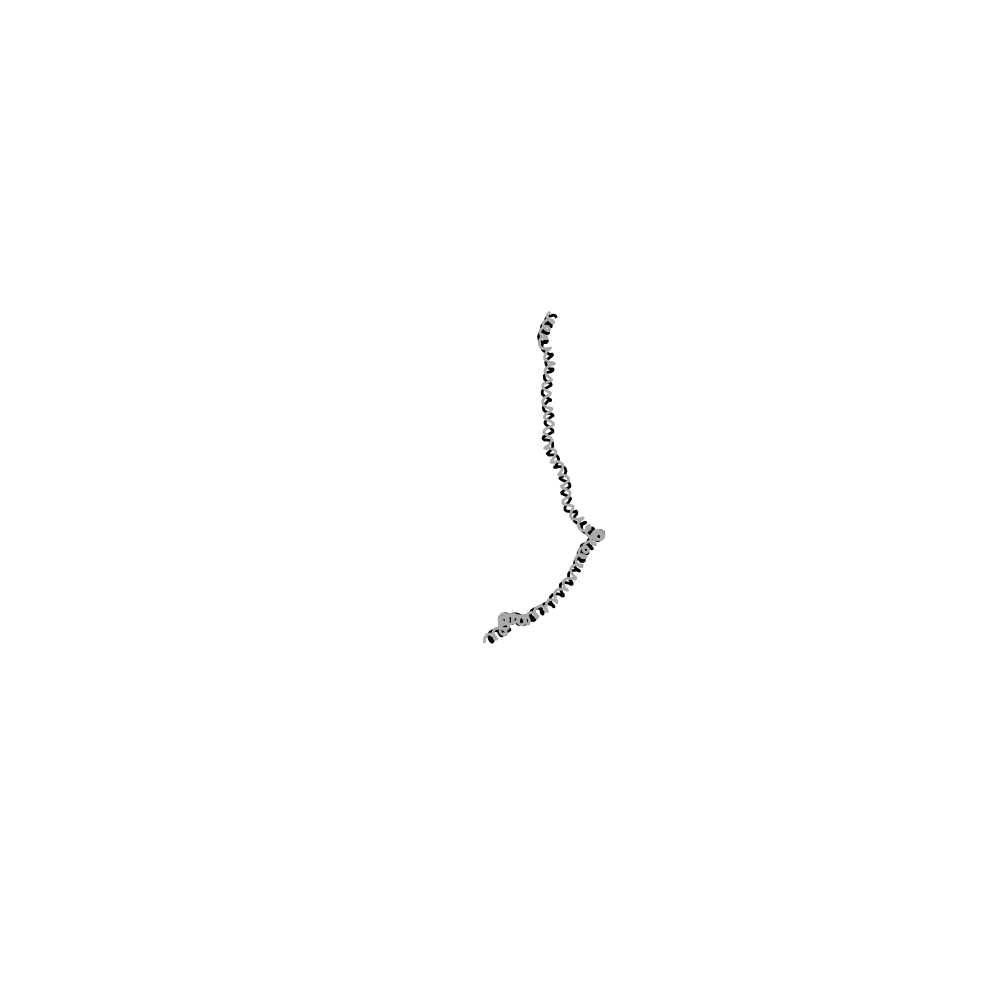

In [48]:
%matplotlib ipympl
fig = plt.figure(figsize=[10,10])
ax = fig.add_subplot(111, projection='3d')
dna.draw(ax=ax, fig=fig, lw=2,markersize=0., helical_axis=False)